In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load Dataset

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

# EDA

In [4]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [7]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
import seaborn as sns
#sns.countplot(data['Loan_Status'],hue=data['Gender'])
sns.countplot(x='Loan_Status', hue='Gender', data=data)


<Axes: xlabel='Loan_Status', ylabel='count'>

Male are having more chance of getting loan than Female

<Axes: xlabel='Loan_Status', ylabel='count'>

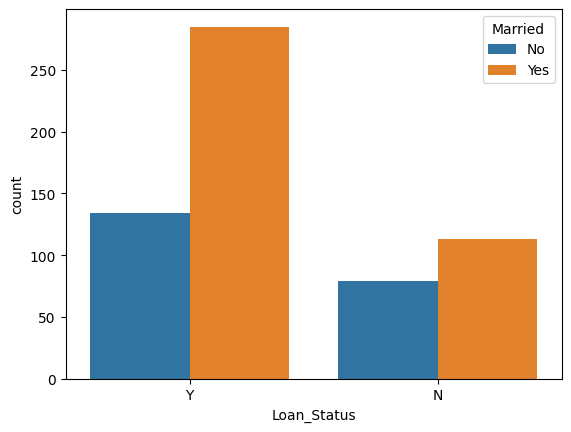

In [9]:
#sns.countplot(data['Loan_Status'],hue=data['Married'])
sns.countplot(x='Loan_Status', hue='Married', data=data)

Married People will get more chance of loan than non married people

In [10]:
#sns.countplot(data['Loan_Status'],hue=data['Dependents'])
sns.countplot(x='Loan_Status', hue='Dependents', data=data)

<Axes: xlabel='Loan_Status', ylabel='count'>

As Dependent Count decreases chances of getting loan increases

In [11]:
#sns.countplot(data['Loan_Status'],hue=data['Education'])
sns.countplot(x='Loan_Status', hue='Education', data=data)

<Axes: xlabel='Loan_Status', ylabel='count'>

Person who is educated will have a more chance of getting the loan than the non graduate

In [12]:
#sns.countplot(data['Loan_Status'],hue=data['Self_Employed'])
sns.countplot(x='Loan_Status', hue='Self_Employed', data=data)

<Axes: xlabel='Loan_Status', ylabel='count'>

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

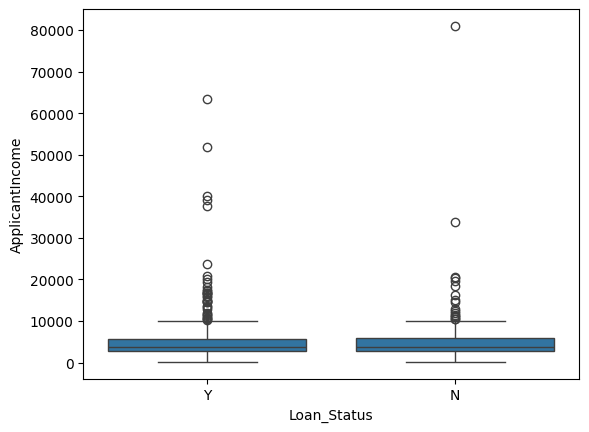

In [13]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=data)

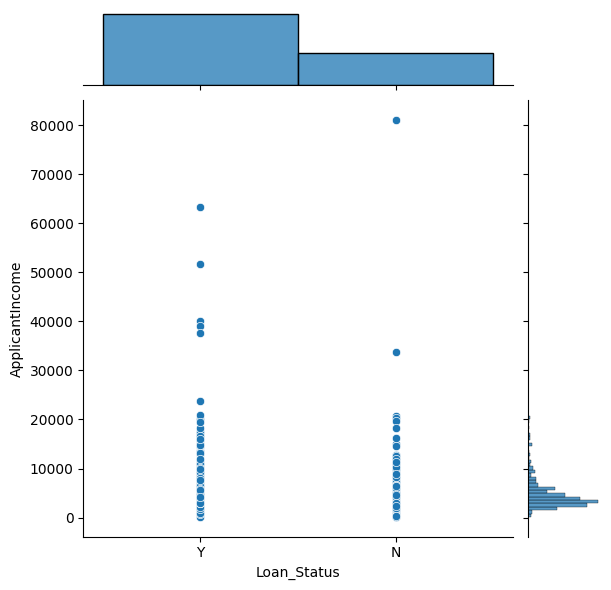

In [14]:
sns.jointplot(x='Loan_Status',y='ApplicantIncome',data=data)

If a person is having more income then he has some chance of getting loan but we are not so confident as these may be outliers

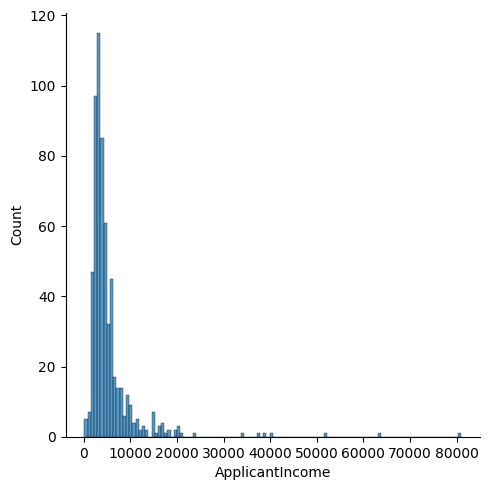

In [15]:
sns.displot(data['ApplicantIncome'])

Mostly applicant's income is between 0K-15K

In [16]:
sns.jointplot(x='LoanAmount',y='ApplicantIncome',data=data)

In [17]:
#corr=data.corr()
#sns.heatmap(corr)

corr = data.select_dtypes(include=[float, int]).corr()
sns.heatmap(corr)
data_encoded = pd.get_dummies(data, drop_first=True)
corr = data_encoded.corr()
sns.heatmap(corr)

<Axes: >

In [18]:
data.drop(['LoanAmount'],axis=1,inplace=True)

<Axes: xlabel='Loan_Status', ylabel='count'>

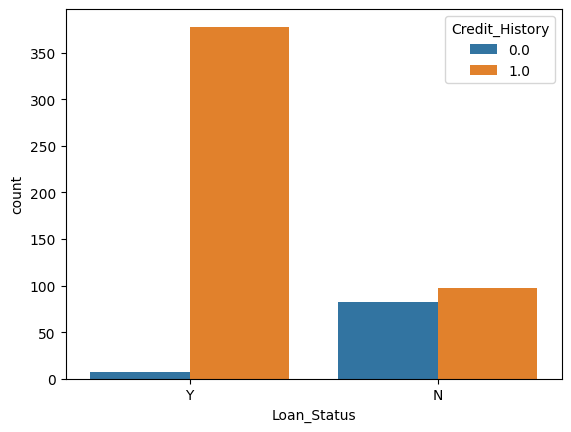

In [19]:
#sns.countplot(data['Loan_Status'],hue=data['Credit_History'])
sns.countplot(x='Loan_Status', hue='Credit_History', data=data)

## Handling Missing Values

In [20]:
loan_credit_1Y=data['Loan_Status']=='Y'

In [21]:
loan_credit_1Y=list(loan_credit_1Y)

In [22]:
data.loc[loan_credit_1Y,'Credit_History']=data.loc[loan_credit_1Y,'Credit_History'].fillna(1.0)

In [23]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History       13
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
loan_credit_0N=data['Loan_Status']=='N'

In [25]:
loan_credit_0N=list(loan_credit_0N)

In [26]:
data.loc[loan_credit_0N,'Credit_History']=data.loc[loan_credit_0N,'Credit_History'].fillna(0.0)

In [27]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
data.dropna()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  \
0                  0.0             360.0             1.0         Urban   
1               1508.0             360.0             1.0         Rural   
2                  0.0             360.0             1.0         Urban   
3               2358.0             360.0             1.0         Urban   
4                  0.0             360.0             1.0         Urban   
..                 ...               ...             ...           ...   
609                0.0             360.0             1.0         Rural   
610                0.0             180.0             1.0         Rural   
611              240.0             360.0             1.0         Urban   
612                0.0             360.0             1.0         Urban   
613                0.0             360.0             0.0     Semiurban   

    Loan_Status  
0             Y  
1             N  
2             Y  
3             Y  
4             Y  
..          ...  
609           Y  
610           Y  
611           Y  
612           Y  
613           N  

[542 rows x 11 columns]

In [29]:
data.dropna(inplace=True,axis=0)

# Data Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
le.fit(data['Gender'])

LabelEncoder()

In [33]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [34]:
data['Gender']=le.transform(data['Gender'])

In [35]:
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0       1      No          0      Graduate            No             5849   
1       1     Yes          1      Graduate            No             4583   
2       1     Yes          0      Graduate           Yes             3000   
3       1     Yes          0  Not Graduate            No             2583   
4       1      No          0      Graduate            No             6000   

   CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  \
0                0.0             360.0             1.0         Urban   
1             1508.0             360.0             1.0         Rural   
2                0.0             360.0             1.0         Urban   
3             2358.0             360.0             1.0         Urban   
4                0.0             360.0             1.0         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [36]:
le.fit(data['Married'])

LabelEncoder()

In [37]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [38]:
data['Married']=le.transform(data['Married'])

In [39]:
data.head()

Gender  Married Dependents     Education Self_Employed  ApplicantIncome  \
0       1        0          0      Graduate            No             5849   
1       1        1          1      Graduate            No             4583   
2       1        1          0      Graduate           Yes             3000   
3       1        1          0  Not Graduate            No             2583   
4       1        0          0      Graduate            No             6000   

   CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  \
0                0.0             360.0             1.0         Urban   
1             1508.0             360.0             1.0         Rural   
2                0.0             360.0             1.0         Urban   
3             2358.0             360.0             1.0         Urban   
4                0.0             360.0             1.0         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [40]:
le.fit(data['Dependents'])

LabelEncoder()

In [41]:
le.classes_

array(['0', '1', '2', '3+'], dtype=object)

In [42]:
data['Dependents']=le.transform(data['Dependents'])

In [43]:
data.head()

Gender  Married  Dependents     Education Self_Employed  ApplicantIncome  \
0       1        0           0      Graduate            No             5849   
1       1        1           1      Graduate            No             4583   
2       1        1           0      Graduate           Yes             3000   
3       1        1           0  Not Graduate            No             2583   
4       1        0           0      Graduate            No             6000   

   CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  \
0                0.0             360.0             1.0         Urban   
1             1508.0             360.0             1.0         Rural   
2                0.0             360.0             1.0         Urban   
3             2358.0             360.0             1.0         Urban   
4                0.0             360.0             1.0         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [44]:
data['Education']=le.fit_transform(data['Education'])

In [45]:
le.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

In [46]:
data.head()

Gender  Married  Dependents  Education Self_Employed  ApplicantIncome  \
0       1        0           0          0            No             5849   
1       1        1           1          0            No             4583   
2       1        1           0          0           Yes             3000   
3       1        1           0          1            No             2583   
4       1        0           0          0            No             6000   

   CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  \
0                0.0             360.0             1.0         Urban   
1             1508.0             360.0             1.0         Rural   
2                0.0             360.0             1.0         Urban   
3             2358.0             360.0             1.0         Urban   
4                0.0             360.0             1.0         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [47]:
data['Self_Employed']=le.fit_transform(data['Self_Employed'])

In [48]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [49]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  \
0                0.0             360.0             1.0         Urban   
1             1508.0             360.0             1.0         Rural   
2                0.0             360.0             1.0         Urban   
3             2358.0             360.0             1.0         Urban   
4                0.0             360.0             1.0         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [50]:
data['Property_Area']=le.fit_transform(data['Property_Area'])

In [51]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0                0.0             360.0             1.0              2   
1             1508.0             360.0             1.0              0   
2                0.0             360.0             1.0              2   
3             2358.0             360.0             1.0              2   
4                0.0             360.0             1.0              2   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [52]:
le.classes_

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [53]:
data['Loan_Status']=le.fit_transform(data['Loan_Status'])

In [54]:
le.classes_

array(['N', 'Y'], dtype=object)

In [55]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0                0.0             360.0             1.0              2   
1             1508.0             360.0             1.0              0   
2                0.0             360.0             1.0              2   
3             2358.0             360.0             1.0              2   
4                0.0             360.0             1.0              2   

   Loan_Status  
0            1  
1            0  
2            1  
3            1  
4            1

In [56]:
le.fit(data['Credit_History'])

LabelEncoder()

In [57]:
le.classes_

array([0., 1.])

In [58]:
data['Credit_History']=le.transform(data['Credit_History'])

In [59]:
data['Loan_Amount_Term']=le.fit_transform(data['Loan_Amount_Term'])

In [60]:
le.classes_

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.])

In [61]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0                0.0                 8               1              2   
1             1508.0                 8               1              0   
2                0.0                 8               1              2   
3             2358.0                 8               1              2   
4                0.0                 8               1              2   

   Loan_Status  
0            1  
1            0  
2            1  
3            1  
4            1

# MinMax Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
mms=MinMaxScaler()

In [64]:
data['ApplicantIncome']=mms.fit_transform(np.array(data['ApplicantIncome']).reshape(-1,1))

In [65]:
mms.data_range_

array([80850.])

In [66]:
mms.data_min_

array([150.])

In [67]:
mms.data_max_

array([81000.])

In [68]:
mmsc=MinMaxScaler()

In [69]:
data['CoapplicantIncome']=mmsc.fit_transform(np.array(data['CoapplicantIncome']).reshape(-1,1))

In [70]:
mmsc.data_range_

array([33837.])

In [71]:
mmsc.data_min_

array([0.])

In [72]:
mmsc.data_max_

array([33837.])

# Splitting The Data

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(['Loan_Status'],axis=1),data['Loan_Status'],test_size=0.2,random_state=42)

In [75]:
x_test

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
409       1        1           3          0              0         1.000000   
83        1        1           0          0              0         0.072356   
402       1        0           0          0              0         0.029066   
97        1        1           0          0              0         0.022597   
270       0        0           0          0              0         0.038182   
..      ...      ...         ...        ...            ...              ...   
172       1        1           3          1              0         0.041707   
55        1        1           2          0              0         0.031639   
106       1        1           2          0              0         0.139357   
556       0        0           0          0              0         0.031132   
606       1        1           1          0              0         0.040198   

     CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  
409           0.000000                 8               0              0  
83            0.066495                 8               0              1  
402           0.591069                 8               1              1  
97            0.029465                 8               1              1  
270           0.000000                 8               1              2  
..                 ...               ...             ...            ...  
172           0.000000                 5               1              0  
55            0.034489                 8               1              1  
106           0.033277                 8               1              2  
556           0.048024                 8               1              2  
606           0.073884                 8               1              1  

[109 rows x 10 columns]

# *Model Preparation*

## Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model_lg=LogisticRegression()

In [78]:
model_lg.fit(x_train,y_train)

LogisticRegression()

In [79]:
y_pred_lr=model_lg.predict(x_test)

## SVM

In [80]:
from sklearn.svm import SVC

In [81]:
model_svm=SVC()

In [82]:
model_svm.fit(x_train,y_train)

SVC()

In [83]:
y_pred_svm=model_svm.predict(x_test)

## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
model_dtc=DecisionTreeClassifier()

In [86]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
y_pred_dtc=model_dtc.predict(x_test)

## RandomForest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model_rfc=RandomForestClassifier()

In [90]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
y_pred_rfc=model_rfc.predict(x_test)

## Naive Bayes MultinomialDB

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
model_mnb=MultinomialNB()

In [94]:
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [95]:
y_pred_mnb=model_mnb.predict(x_test)

## KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
model_knn=KNeighborsClassifier()

In [98]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred_knn=model_knn.predict(x_test)

In [100]:
y_pred_knn

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

# Metrics Measurement

In [101]:
import sklearn.metrics as m

In [102]:
y_predict=[]
for i in range(len(y_test)):
  y_p=[np.array(y_test)[i],y_pred_dtc[i],y_pred_knn[i],y_pred_lr[i],y_pred_mnb[i],y_pred_rfc[i],y_pred_svm[i]]
  y_predict.append(y_p)


In [103]:
y_predictions_all=pd.DataFrame(y_predict,columns=['y_actual','Decision Tree','KNN','Logistic Regression','Multinomial NB','RandomForestClassifier','SupportVectorMachine'])

In [104]:
y_predictions_all

y_actual  Decision Tree  KNN  Logistic Regression  Multinomial NB  \
0           0              1    1                    0               1   
1           0              0    0                    0               1   
2           1              1    1                    1               1   
3           1              1    1                    1               1   
4           1              1    1                    1               1   
..        ...            ...  ...                  ...             ...   
104         0              0    1                    1               1   
105         1              1    1                    1               1   
106         1              1    1                    1               1   
107         1              1    1                    1               1   
108         1              1    1                    1               1   

     RandomForestClassifier  SupportVectorMachine  
0                         0                     0  
1                         0                     0  
2                         1                     1  
3                         1                     1  
4                         1                     1  
..                      ...                   ...  
104                       1                     1  
105                       1                     1  
106                       1                     1  
107                       1                     1  
108                       1                     1  

[109 rows x 7 columns]

In [105]:
y_models=[y_pred_dtc,y_pred_knn,y_pred_lr,y_pred_mnb,y_pred_rfc,y_pred_svm]

In [106]:
metrics=[]
for y_pred in y_models:
  mt=[m.accuracy_score(y_test,y_pred),m.f1_score(y_test,y_pred),m.log_loss(y_test,y_pred),m.precision_score(y_test,y_pred),m.recall_score(y_test,y_pred)]
  metrics.append(mt)

In [107]:
model_names=['Decision Tree','KNN','Logistic Regression','Multinomial NB','RandomForestClassifier','SupportVectorMachine']

In [108]:
metric_names=['accuracy','f1 score','logloss','precision','recall']

In [109]:
metric_models=pd.DataFrame(metrics,columns=metric_names,index=model_names)

In [110]:
metric_models

accuracy  f1 score    logloss  precision    recall
Decision Tree           0.678899  0.755245  11.573650   0.805970  0.710526
KNN                     0.743119  0.837209   9.258920   0.750000  0.947368
Logistic Regression     0.807339  0.872727   6.944190   0.808989  0.947368
Multinomial NB          0.697248  0.821622  10.912299   0.697248  1.000000
RandomForestClassifier  0.807339  0.867925   6.944190   0.831325  0.907895
SupportVectorMachine    0.807339  0.872727   6.944190   0.808989  0.947368

## Final Evaluation and Saving Model

After seeing the above table we can confidently say that SVM Performs Well

In [111]:
import pickle

In [112]:
pickle.dump(model_svm,open("model_svm.pkl","wb+"),protocol=pickle.HIGHEST_PROTOCOL)